<div class="row">

  <!----><div>
    <div class="row sm-margin tab-margin">
      <div class="col-md-8 col-xs-12 col-sm-12 item-heading">
        <div class="row">
          <div class="chapterbullet">
       
          </div>
          <h3 class="col-sm-10 col-xs-10 item-title">Project: Work on Your Data Story
            <!---->
          </h3>
        </div>
      </div>
    </div>
    <div class="row text-content project-text sm-margin tab-margin">
      <div class="deliverable-text-container col-sm-7 col-md-8 col-xs-12">
        <!----><p class="project-estimate show-effort">5 - 10 Hours</p>
        <div class="deliverable-text"><p>How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story</p>
<ol><ol>
<li dir="ltr">
<p dir="ltr">Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on <a href="http://blog.modeanalytics.com/five-public-dataset/" target="_blank">Mode Analytics</a> or <a href="http://www.google.com/publicdata/directory" target="_blank">Google's public data sets directory</a>, or pick another one you like from elsewhere.</p>
</li>
<li dir="ltr">
<p dir="ltr">Get going by asking the following questions and looking for the answers with some code and plots:</p>
</li>
<ol>
<li dir="ltr">
<p dir="ltr">Can you count something interesting?</p>
</li>
<li dir="ltr">
<p dir="ltr">Can you find some trends (high, low, increase, decrease, anomalies)?</p>
</li>
<li dir="ltr">
<p dir="ltr">Can you make a bar plot or a histogram?</p>
</li>
<li dir="ltr">
<p dir="ltr">Can you compare two related quantities?</p>
</li>
<li dir="ltr">
<p dir="ltr">Can you make a scatterplot?</p>
</li>
<li dir="ltr">
<p dir="ltr">Can you make a time-series plot?</p>
</li>
</ol>
<li dir="ltr">
<p dir="ltr">Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?</p>
</li>
<li dir="ltr">
<p dir="ltr">By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?</p>
</li>
</ol></ol>
<p><strong>Submission Requirements:&nbsp;</strong>Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:</p>
<ol>
<li>The questions you asked</li>
<li>The trends you investigated</li>
<li>The resulting visualizations and conclusions.</li>
</ol>
<p>In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.</p></div>
 
   </div></div>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style("darkgrid")
sns.set_context("notebook")
current_palette = sns.color_palette("hls", 8)

In [29]:
path ='crime_final_clean10_17.csv'

In [30]:
data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           65536 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 92.1+ MB


In [31]:
# extract years 2010-2017
df = data.loc['2010':'2017']

# Lets count something intresting

Lets find total crimes reported between 2010 -2017


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003745 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003745 non-null object
BlockRange     1003589 non-null object
StreetName     1003719 non-null object
OffenseType    1003745 non-null object
Premise        1003745 non-null object
NumOffenses    1003745 non-null float64
Hour           65454 non-null float64
day            1003745 non-null int64
weekday        1003745 non-null object
month          1003745 non-null object
year           1003745 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 91.9+ MB


# Lets find some trends

>Find the min and max values for the dataframe


In [61]:
df.StreetName.value_counts().head()

WESTHEIMER    27553
GULF          14169
GESSNER       13923
NORTH         12660
RICHMOND      12383
Name: StreetName, dtype: int64

In [83]:
df.StreetName.value_counts().tail()

WEEMS ST              1
SOUTH FORD            1
NULAKEAST             1
INDIGO BRUSH DRIVE    1
REDFORD B             1
Name: StreetName, dtype: int64

In [62]:
df.Beat.value_counts().head()

19G10    21422
12D10    21242
1A20     20938
6B60     20067
13D20    19135
Name: Beat, dtype: int64

In [113]:
df.Beat.value_counts().tail(10)

21I40    106
HCSO      68
OOJ       41
23J40     27
23J30     12
UH-3P      6
23J20      3
23J10      2
7C60       1
3B20       1
Name: Beat, dtype: int64

In [115]:
df.Premise.value_counts().head()

APARTMENT                74027
RESIDENCE/HOUSE          73818
APARTMENT PARKING LOT    65335
Residence or House       55351
Apartment Parking Lot    45670
Name: Premise, dtype: int64

In [88]:
df.Premise.value_counts().tail(10)

CONTRA-FLOW/HOV                       5
Adult Theater/Arcade                  5
23C                                   5
Cantina                               4
Vacant Bank                           4
Modeling Studio                       2
RES                                   1
Vacant Jail or Prison                 1
VACANT BANK                           1
Contra-Flow, Managed, or HOV Lanes    1
Name: Premise, dtype: int64

In [100]:
df.Hour.value_counts().head()

18.0    4209
20.0    3842
19.0    3833
17.0    3764
12.0    3611
Name: Hour, dtype: int64

In [101]:
df.Hour.value_counts().tail()

1.0    1476
6.0    1461
3.0    1153
5.0    1013
4.0     942
Name: Hour, dtype: int64

In [117]:
df.weekday.value_counts().head()

Friday       154094
Monday       147879
Thursday     144309
Wednesday    143902
Tuesday      142979
Name: weekday, dtype: int64

In [118]:
df.weekday.value_counts().tail()

Thursday     144309
Wednesday    143902
Tuesday      142979
Saturday     142261
Sunday       128321
Name: weekday, dtype: int64

In [107]:
df.month.value_counts().head()

Jul    88814
May    88371
Aug    88161
Dec    85838
Jan    85494
Name: month, dtype: int64

In [108]:
df.month.value_counts().tail()

Jun    82904
Sep    81833
Nov    81506
Mar    81214
Feb    71605
Name: month, dtype: int64

In [109]:
df.year.value_counts().head()

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
Name: year, dtype: int64

In [111]:
df.year.value_counts().tail()

2011    127168
2016    122423
2014    121451
2015    120079
2017    118581
Name: year, dtype: int64


---
## Answers
### Streets: 

- WESTHEIMER :  27553
- many

### Beat

- 19G10  :  21422
- 21I40   : 106 ( realistic value)

### Premise

- APARTMENT:                74027
- VACANT BANK     :                      1

### Hour

- 18.0  :  4209
- 4.0    : 942


### weekday
- Friday   :    154094
- Sunday    :   128321

### month
- Jul  :  88814
- Feb   : 71605

### year

- 2010   : 136357
- 2017  :  118581

# Les plot something

- display barplot with the sum of each Offense type from 2010-2017
- display a barplot with the


In [119]:

offenses = df[df.OffenseType.values != 'UNK']  #remove UNK whose value =14

In [140]:
# crime data from the top 5 Premise locations
premises = [premise for premise in offenses['Premise'].value_counts().head(5).reset_index()['index']]
df2 = pd.DataFrame()
for premise in premises:
    df2 = pd.concat([df2,offenses[offenses['Premise']==premise]],axis=0)

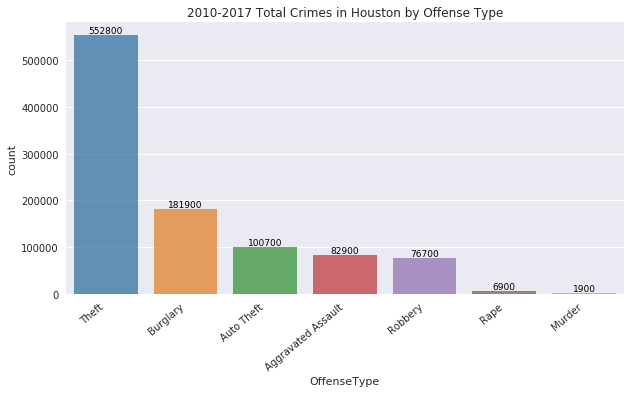

In [133]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="OffenseType",
              data=offenses,
             
              alpha=0.75,
             order=offenses['OffenseType'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


ax.set_title('2010-2017 Total Crimes in Houston by Offense Type');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

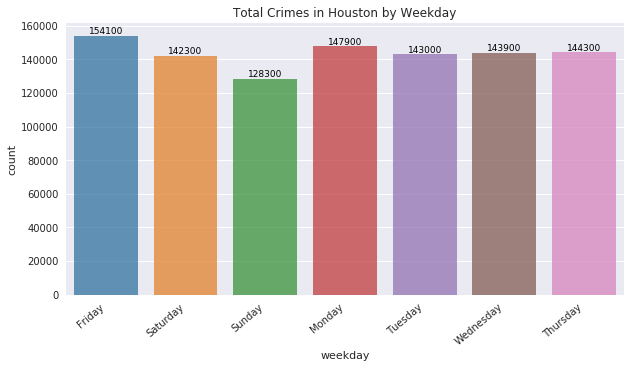

In [137]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="weekday",
              data=offenses,
             
              alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


ax.set_title('Total Crimes in Houston by Weekday');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

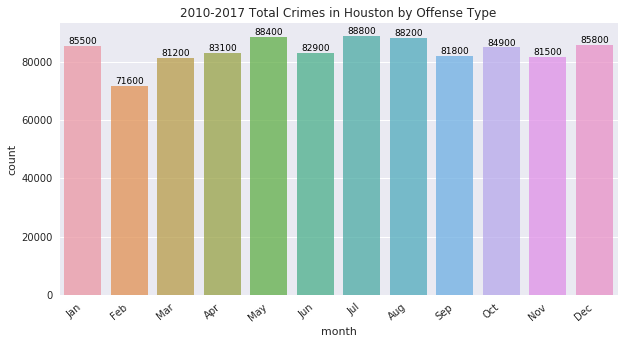

In [135]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="month",
              data=offenses,
             
              alpha=0.75,)
             #order=offenses['weekday'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


ax.set_title('Total Crimes in Houston by Month');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

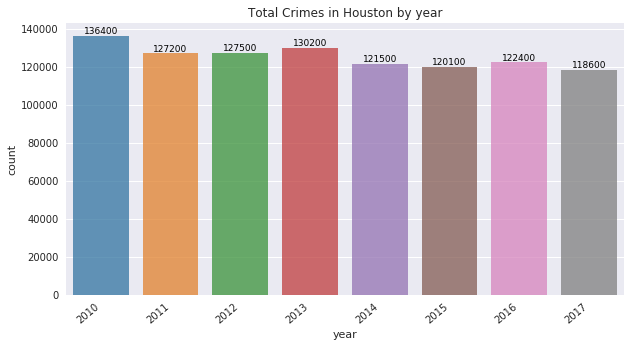

In [138]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="year",
              data=offenses,
             
              alpha=0.75,)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


ax.set_title('Total Crimes in Houston by year');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

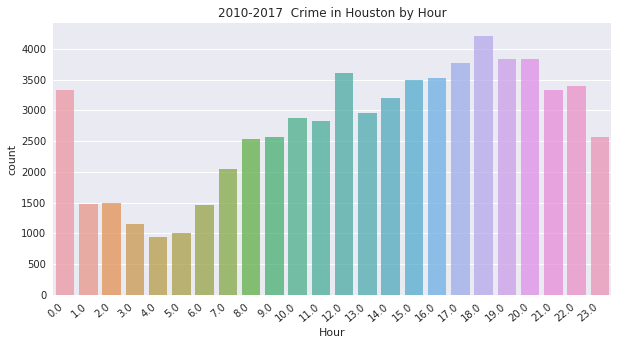

In [123]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="Hour",
              data=df,
              alpha=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('2010-2017  Crime in Houston by Hour');

sns.despine()

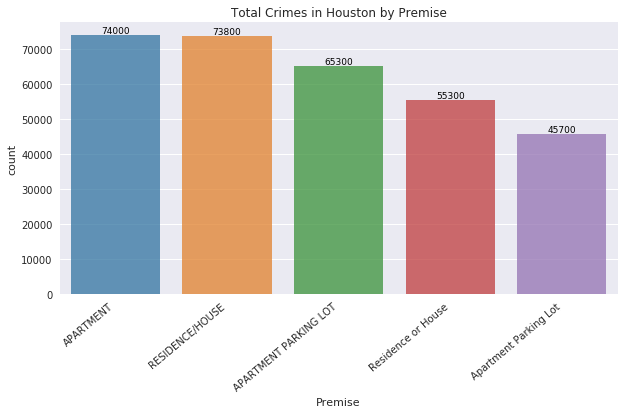

In [141]:
fig,ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x="Premise",
              data=df2,
             
              alpha=0.75)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


ax.set_title('Total Crimes in Houston by Premise');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

# Can you compare two related quantities?


In [156]:
# remove theft from offenses
offenses = df[df.OffenseType.values != 'Theft']  #remove UNK whose value =14

In [157]:
yr10 = offenses.loc['2010']
yr11 = offenses.loc['2011']
yr12 = offenses.loc['2012']
yr13 = offenses.loc['2013']
yr14 = offenses.loc['2014']
yr15 = offenses.loc['2015']
yr16 = offenses.loc['2016']
yr17 = offenses.loc['2017']

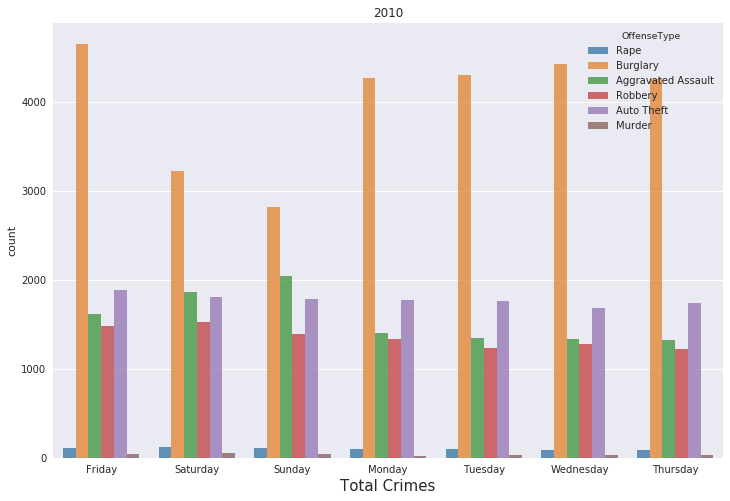

In [158]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='weekday',
              hue='OffenseType',
              data=yr10,
              alpha=0.75)

ax.set_title('2010')
ax.set_xlabel('Total Crimes', fontsize=15);

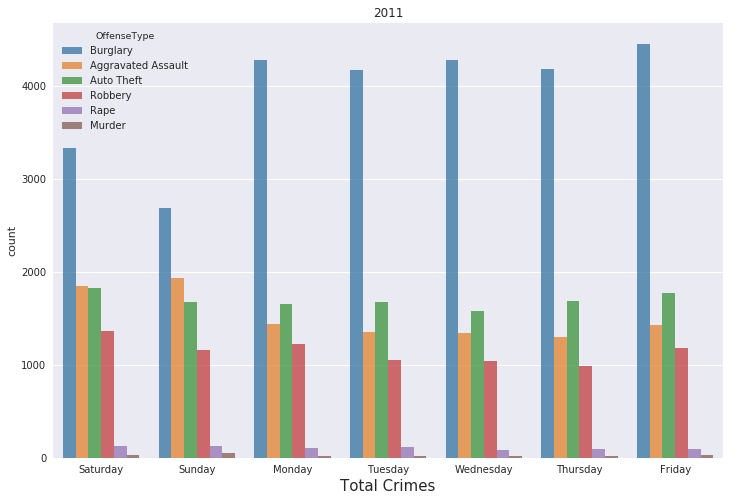

In [159]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='weekday',
              hue='OffenseType',
              data=yr11,
              alpha=0.75)

ax.set_title('2011')
ax.set_xlabel('Total Crimes', fontsize=15);

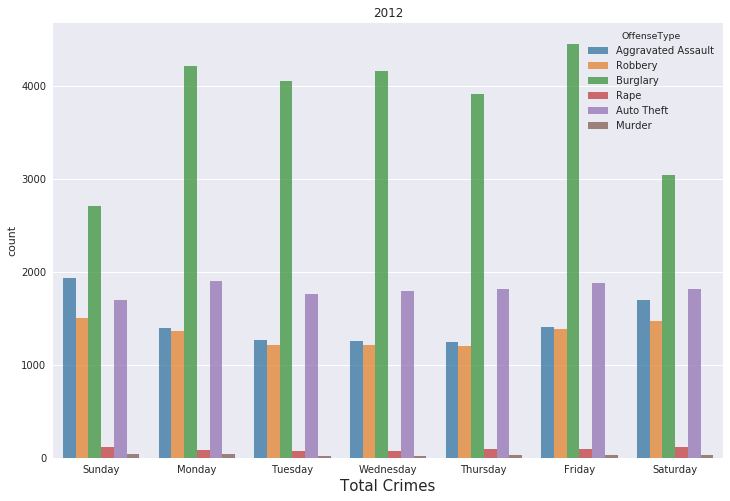

In [160]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='weekday',
              hue='OffenseType',
              data=yr12,
              alpha=0.75)

ax.set_title('2012')
ax.set_xlabel('Total Crimes', fontsize=15);

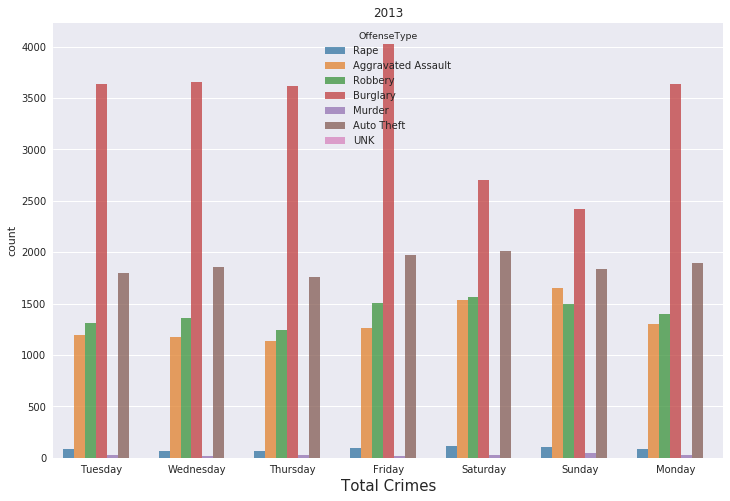

In [162]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='weekday',
              hue='OffenseType',
              data=yr13,
              alpha=0.75)

ax.set_title('2013')
ax.set_xlabel('Total Crimes', fontsize=15);

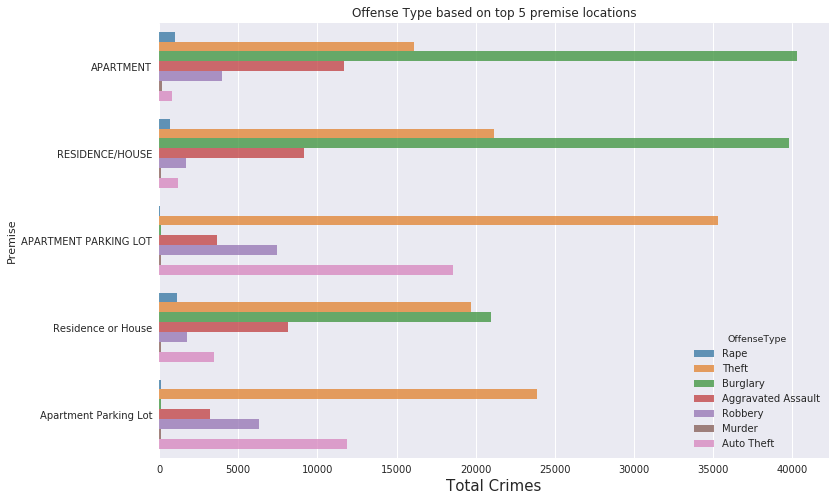

In [142]:

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y='Premise',
              hue='OffenseType',
              data=df2,
              alpha=0.75)

ax.set_title('Offense Type based on top 5 premise locations')
ax.set_xlabel('Total Crimes', fontsize=15);
